# 1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.


Matrix multiplication involves the calculation of the product of two matrices, and to obtain that we need to perform several additions and multiplications between the elements.

Let's say a matrix A(n,k) and matrix B(k,m) which when multiplied will give us a resultant matrix C(n,m).

Generally, to calculate one resultant element let's say C[i][j], we have to multiply each element of the i-th row of matrix A with the corresponding element in the j-th column of the matrix B.

So we can say, $ C[i][j] = A[i][1] * B[1][j] + A[i][2] * B[2][j] + A[i][3] * B[3][j] + ..... + A[i][k] * B[k][j] $

Therefore we can conclude that we are performing 'k' multiplications and 'k-1' additions for each element.

And again there are total $ n * m $ elements in the resultant matrix hence we need :

**Total multiplication : $ n * m * k $** ,
**Total additions : $ n * m * (k-1) $**

Example:
Let's take an example of two matrices A(2,3) and B(3,2),

Matrix A :

$ \begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6
\end{bmatrix}  $

Matrix B :

$ \begin{bmatrix}
7 & 8 \\
9 & 10 \\
11 & 12
\end{bmatrix}  $

The resultant matrix will be C(2,2)

1. $ C[1][1] = (1*7)+(2*9)+(3*11) $
2. $ C[1][2] = (1*8)+(2*10)+(3*12) $
3. $ C[2][1] = (4*7)+(5*9)+(6*11) $
4. $ C[1][2] = (4*8)+(5*10)+(6*12) $

Here we can notice that the total number of :
1. Multiplication = $ n*m*k = 2*2*3 = 12 $
2. Addition = $ n*m*(k-1) = 2*2*2 = 8 $



# 2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

Case 1 : Considering the above matrices we will have a similar performance in both list of lists and by using NumPy since NumPy works better for larger dimensions.

In [1]:
import time
import numpy as np

# Small matrices
A1 = [[1, 2, 3],
    [4, 5, 6]]

B1 = [[7, 8],
    [9, 10],
    [11, 12]]

def matrix_mul(A, B):
    rows_A = len(A)
    cols_A = len(A[0])
    cols_B = len(B[0])
    C = [[0 for _ in range(cols_B)] for _ in range(rows_A)]
    for i in range(rows_A):
        for j in range(cols_B):
            for k in range(cols_A):
                C[i][j] += A[i][k] * B[k][j]
    return C

# Using list of lists
start_time = time.time()
C1_list = matrix_mul(A1, B1)
end_time = time.time()
time_list_small = end_time - start_time

# Using NumPy
A1_np = np.array(A1)
B1_np = np.array(B1)
start_time = time.time()
C1_np = np.dot(A1_np, B1_np)
end_time = time.time()
time_numpy_small = end_time - start_time

print("Scenario 1: Similar Performance")
print(f"Time using list of lists: {time_list_small:.20f} seconds")
print(f"Time using NumPy: {time_numpy_small:.20f} seconds\n")

Scenario 1: Similar Performance
Time using list of lists: 0.00017452239990234375 seconds
Time using NumPy: 0.00276899337768554688 seconds



Case 2: In case of very small matrices the list of lists will sometimes perform slightly better than the NumPy with negligible difference

In [2]:
A2 = [[1, 2]]

B2 = [[3],
     [4]]

# Using list of lists
start_time = time.time()
C2_list = matrix_mul(A2, B2)
end_time = time.time()
time_list_tiny = end_time - start_time

# Using NumPy
A2_np = np.array(A2)
B2_np = np.array(B2)
start_time = time.time()
C2_np = np.dot(A2_np, B2_np)
end_time = time.time()
time_numpy_tiny = end_time - start_time

print("Scenario 2: Small Matrices")
print(f"Time using list of lists: {time_list_tiny:.20f} seconds")
print(f"Time using NumPy: {time_numpy_tiny:.20f} seconds\n")

Scenario 2: Small Matrices
Time using list of lists: 0.00009131431579589844 seconds
Time using NumPy: 0.00011086463928222656 seconds



Case 3: In case of very large matrices the NumPy function is going to be much faster than the list of lists due to the vectorization and also the implementation of NumPy in C makes it more efficient to execute

In [3]:
np.random.seed(0)
A3 = np.random.randint(0, 10, size=(100, 100)).tolist()
B3 = np.random.randint(0, 10, size=(100, 100)).tolist()

# Using list of lists
start_time = time.time()
C3_list = matrix_mul(A3, B3)
end_time = time.time()
time_list_large = end_time - start_time

# Using NumPy
A3_np = np.array(A3)
B3_np = np.array(B3)
start_time = time.time()
C3_np = np.dot(A3_np, B3_np)
end_time = time.time()
time_numpy_large = end_time - start_time

print("Scenario 3: Large Matrices")
print(f"Time using list of lists: {time_list_large:.6f} seconds")
print(f"Time using NumPy: {time_numpy_large:.6f} seconds")
print(f"NumPy is {time_list_large / time_numpy_large:.2f} times faster than list of lists\n")

Scenario 3: Large Matrices
Time using list of lists: 0.207473 seconds
Time using NumPy: 0.001081 seconds
NumPy is 192.01 times faster than list of lists



# 3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

If we want to find the median of an array using the method of finding the highest element using one pass of the array and finding the second highest element using two passes of the array, then in the case of large arrays it will be highly inefficient, as the time complexity in that case will be $O(n^2)$ in the worst case since we will need k passes for finding k-th highest element.

In [4]:
arr = np.random.randint(0, 10000, size=1000).tolist()

def kth_largest(arr, k):
    for i in range(k):
        max_val = float('-inf')
        for num in arr:
            if num > max_val:
                max_val = num
        arr.remove(max_val)
    return max_val
def median_old(arr):
    n = len(arr)
    if n % 2 == 1:
        return kth_largest(arr.copy(), n // 2 + 1)
    else:
        return (kth_largest(arr.copy(), n // 2) + kth_largest(arr.copy(), n // 2 + 1)) / 2

start_time = time.time()
median_res = median_old(arr)
end_time = time.time()
time_res = end_time - start_time

print(f"Median using inefficient method: {median_res}")
print(f"Time taken by inefficient method: {time_res:.20f} seconds")

start_time = time.time()
median_numpy = np.median(arr)
end_time = time.time()
time_numpy = end_time - start_time

print(f"Median using NumPy: {median_numpy}")
print(f"Time taken by NumPy: {time_numpy:.20f} seconds")

Median using inefficient method: 4884.5
Time taken by inefficient method: 0.10927820205688476562 seconds
Median using NumPy: 4884.5
Time taken by NumPy: 0.00259208679199218750 seconds


#### A relatively better method is to use the quickselect because the time complexity is much better than the previous method

In [5]:
import random

def partition(arr, left, right, pvt):
    pvt_val = arr[pvt]
    arr[pvt], arr[right] = arr[right], arr[pvt]
    store_index = left
    for i in range(left, right):
        if arr[i] < pvt_val:
            arr[store_index], arr[i] = arr[i], arr[store_index]
            store_index += 1
    arr[right], arr[store_index] = arr[store_index], arr[right]
    return store_index

def quickselect(arr, left, right, k):
    if left == right:
        return arr[left]

    pvt = random.randint(left, right)
    pvt = partition(arr, left, right, pvt)

    if k == pvt:
        return arr[k]
    elif k < pvt:
        return quickselect(arr, left, pvt - 1, k)
    else:
        return quickselect(arr, pvt + 1, right, k)

def find_quickselect(arr):
    n = len(arr)
    if n % 2 == 1:
        return quickselect(arr.copy(), 0, n - 1, n // 2)
    else:
        return (quickselect(arr.copy(), 0, n - 1, n // 2 - 1) + quickselect(arr.copy(), 0, n - 1, n // 2)) / 2

# Measure the time for the Quickselect method
start_time = time.time()
median_quickselect = find_quickselect(arr)
end_time = time.time()
time_quickselect = end_time - start_time

print(f"Median using Quickselect method: {median_quickselect}")
print(f"Time taken by Quickselect method: {time_quickselect:.6f} seconds")

Median using Quickselect method: 4884.5
Time taken by Quickselect method: 0.002635 seconds


#4. What is the gradient of the following function with respect to x and y?#
$x^2y + y^3sin(x)$

To find the gradient of the function $ f(x, y) = x^2 y + y^3 \sin(x) $, we compute the partial derivatives with respect to $( x ) $ and $( y )$.

1. *Partial derivative with respect to \( x \)*:

   
   $ \frac{\partial f}{\partial x} = \frac{\partial}{\partial x} (x^2 y + y^3 \sin(x)) $
   


   Therefore,

   
   $ \frac{\partial f}{\partial x} = 2xy + y^3 \cos(x) $
   

2. *Partial derivative with respect to \( y \)*:

   
   $ \frac{\partial f}{\partial y} = \frac{\partial}{\partial y} (x^2 y + y^3 \sin(x)) $


   Therefore,

   
  $ \frac{\partial f}{\partial y} = x^2 + 3y^2 \sin(x) $

So, the gradient of the function $ f(x, y)) $ is:


$ \nabla f(x, y) = \left( \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y} \right) = \left( 2xy + y^3 \cos(x), x^2 + 3y^2 \sin(x) \right) $

#6. Use sympy to confirm that you obtain the same gradient analytically.#

In [15]:
import sympy as sp

# Define the variables
x, y = sp.symbols('x y')

# Define the function
f = x*2 * y + y*3 * sp.sin(x)

# Compute the partial derivatives
df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)

# Display the partial derivatives
print(f"∂f/∂x = {df_dx}")
print(f"∂f/∂y = {df_dy}")

∂f/∂x = 3*y*cos(x) + 2*y
∂f/∂y = 2*x + 3*sin(x)


# 7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:

    1. 2022
        1. Branch 1
                Roll Number: 1,
                Name: N,
                Marks:
                    Maths: 100,
                    English: 70 ...
        2. Branch 2
    2. 2023
        1. Branch 1
        2. Branch 2
    3. 2024
        1. Branch 1
        2. Branch 2
    4. 2025
        1. Branch 1
        2. Branch 2

In [6]:
student_records = {
    2022: {
        "Branch 1": {
            1: {
                "Roll Number": 1,
                "Name": "Lionel Messi",
                "Marks": {
                    "Maths": 95,
                    "English": 85,
                    "Physics": 90
                }
            },
            2: {
                "Roll Number": 2,
                "Name": "Cristiano Ronaldo",
                "Marks": {
                    "Maths": 88,
                    "English": 78,
                    "Physics": 84
                }
            }
        },
        "Branch 2": {
            1: {
                "Roll Number": 1,
                "Name": "Neymar Jr",
                "Marks": {
                    "Maths": 80,
                    "English": 75,
                    "Physics": 82
                }
            },
            2: {
                "Roll Number": 2,
                "Name": "Kylian Mbappe",
                "Marks": {
                    "Maths": 92,
                    "English": 89,
                    "Physics": 94
                }
            }
        }
    },
    2023: {
        "Branch 1": {
            1: {
                "Roll Number": 1,
                "Name": "Luka Modric",
                "Marks": {
                    "Maths": 87,
                    "English": 83,
                    "Physics": 85
                }
            },
            2: {
                "Roll Number": 2,
                "Name": "Sergio Ramos",
                "Marks": {
                    "Maths": 78,
                    "English": 72,
                    "Physics": 80
                }
            }
        },
        "Branch 2": {
            1: {
                "Roll Number": 1,
                "Name": "Robert Lewandowski",
                "Marks": {
                    "Maths": 90,
                    "English": 88,
                    "Physics": 92
                }
            },
            2: {
                "Roll Number": 2,
                "Name": "Kevin De Bruyne",
                "Marks": {
                    "Maths": 85,
                    "English": 80,
                    "Physics": 87
                }
            }
        }
    },
    2024: {
        "Branch 1": {
            1: {
                "Roll Number": 1,
                "Name": "Virgil van Dijk",
                "Marks": {
                    "Maths": 89,
                    "English": 86,
                    "Physics": 88
                }
            },
            2: {
                "Roll Number": 2,
                "Name": "Mohamed Salah",
                "Marks": {
                    "Maths": 82,
                    "English": 79,
                    "Physics": 84
                }
            }
        },
        "Branch 2": {
            1: {
                "Roll Number": 1,
                "Name": "Sadio Mane",
                "Marks": {
                    "Maths": 91,
                    "English": 87,
                    "Physics": 89
                }
            },
            2: {
                "Roll Number": 2,
                "Name": "Eden Hazard",
                "Marks": {
                    "Maths": 83,
                    "English": 78,
                    "Physics": 85
                }
            }
        }
    },
    2025: {
        "Branch 1": {
            1: {
                "Roll Number": 1,
                "Name": "Harry Kane",
                "Marks": {
                    "Maths": 93,
                    "English": 88,
                    "Physics": 91
                }
            },
            2: {
                "Roll Number": 2,
                "Name": "Raheem Sterling",
                "Marks": {
                    "Maths": 84,
                    "English": 80,
                    "Physics": 86
                }
            }
        },
        "Branch 2": {
            1: {
                "Roll Number": 1,
                "Name": "Karim Benzema",
                "Marks": {
                    "Maths": 88,
                    "English": 82,
                    "Physics": 89
                }
            },
            2: {
                "Roll Number": 2,
                "Name": "Antoine Griezmann",
                "Marks": {
                    "Maths": 79,
                    "English": 74,
                    "Physics": 81
                }
            }
        }
    }
}


# 8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [7]:
class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks

    def __repr__(self):
        return f"Student(roll_number={self.roll_number}, name='{self.name}', marks={self.marks})"

class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []

    def add_student(self, student):
        self.students.append(student)

    def __repr__(self):
        return f"Branch(name='{self.name}', students={self.students})"

class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)

    def __repr__(self):
        return f"Year(year={self.year}, branches={self.branches})"

class Database:
    def __init__(self):
        self.years = []

    def add_year(self, year):
        self.years.append(year)

    def __repr__(self):
        return f"Database(years={self.years})"

# Create the database
db = Database()

year_2022 = Year(2022)
branch_1_2022 = Branch("Branch 1")
branch_1_2022.add_student(Student(1, "Lionel Messi", {"Maths": 95, "English": 85, "Physics": 90}))
branch_1_2022.add_student(Student(2, "Cristiano Ronaldo", {"Maths": 88, "English": 78, "Physics": 84}))
branch_2_2022 = Branch("Branch 2")
branch_2_2022.add_student(Student(1, "Neymar Jr", {"Maths": 80, "English": 75, "Physics": 82}))
branch_2_2022.add_student(Student(2, "Kylian Mbappe", {"Maths": 92, "English": 89, "Physics": 94}))

year_2022.add_branch(branch_1_2022)
year_2022.add_branch(branch_2_2022)
db.add_year(year_2022)

year_2023 = Year(2023)
branch_1_2023 = Branch("Branch 1")
branch_1_2023.add_student(Student(1, "Luka Modric", {"Maths": 87, "English": 83, "Physics": 85}))
branch_1_2023.add_student(Student(2, "Sergio Ramos", {"Maths": 78, "English": 72, "Physics": 80}))
branch_2_2023 = Branch("Branch 2")
branch_2_2023.add_student(Student(1, "Robert Lewandowski", {"Maths": 90, "English": 88, "Physics": 92}))
branch_2_2023.add_student(Student(2, "Kevin De Bruyne", {"Maths": 85, "English": 80, "Physics": 87}))

year_2023.add_branch(branch_1_2023)
year_2023.add_branch(branch_2_2023)
db.add_year(year_2023)

year_2024 = Year(2024)
branch_1_2024 = Branch("Branch 1")
branch_1_2024.add_student(Student(1, "Virgil van Dijk", {"Maths": 89, "English": 86, "Physics": 88}))
branch_1_2024.add_student(Student(2, "Mohamed Salah", {"Maths": 82, "English": 79, "Physics": 84}))
branch_2_2024 = Branch("Branch 2")
branch_2_2024.add_student(Student(1, "Sadio Mane", {"Maths": 91, "English": 87, "Physics": 89}))
branch_2_2024.add_student(Student(2, "Eden Hazard", {"Maths": 83, "English": 78, "Physics": 85}))

year_2024.add_branch(branch_1_2024)
year_2024.add_branch(branch_2_2024)
db.add_year(year_2024)

year_2025 = Year(2025)
branch_1_2025 = Branch("Branch 1")
branch_1_2025.add_student(Student(1, "Harry Kane", {"Maths": 93, "English": 88, "Physics": 91}))
branch_1_2025.add_student(Student(2, "Raheem Sterling", {"Maths": 84, "English": 80, "Physics": 86}))
branch_2_2025 = Branch("Branch 2")
branch_2_2025.add_student(Student(1, "Karim Benzema", {"Maths": 88, "English": 82, "Physics": 89}))
branch_2_2025.add_student(Student(2, "Antoine Griezmann", {"Maths": 79, "English": 74, "Physics": 81}))

year_2025.add_branch(branch_1_2025)
year_2025.add_branch(branch_2_2025)
db.add_year(year_2025)

print(db)


Database(years=[Year(year=2022, branches=[Branch(name='Branch 1', students=[Student(roll_number=1, name='Lionel Messi', marks={'Maths': 95, 'English': 85, 'Physics': 90}), Student(roll_number=2, name='Cristiano Ronaldo', marks={'Maths': 88, 'English': 78, 'Physics': 84})]), Branch(name='Branch 2', students=[Student(roll_number=1, name='Neymar Jr', marks={'Maths': 80, 'English': 75, 'Physics': 82}), Student(roll_number=2, name='Kylian Mbappe', marks={'Maths': 92, 'English': 89, 'Physics': 94})])]), Year(year=2023, branches=[Branch(name='Branch 1', students=[Student(roll_number=1, name='Luka Modric', marks={'Maths': 87, 'English': 83, 'Physics': 85}), Student(roll_number=2, name='Sergio Ramos', marks={'Maths': 78, 'English': 72, 'Physics': 80})]), Branch(name='Branch 2', students=[Student(roll_number=1, name='Robert Lewandowski', marks={'Maths': 90, 'English': 88, 'Physics': 92}), Student(roll_number=2, name='Kevin De Bruyne', marks={'Maths': 85, 'English': 80, 'Physics': 87})])]), Year(

# 9. Using matplotlib, plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5

i. $ y = x $

ii. $ y = x^2 $

iii. $ y = \frac{x^3}{100} $

iv. $ y = sin(x)^2 $

v. $ y = \frac{\sin(x)}{x} $

vi. $ y = \log(x) $

vii. $ y = e^x $

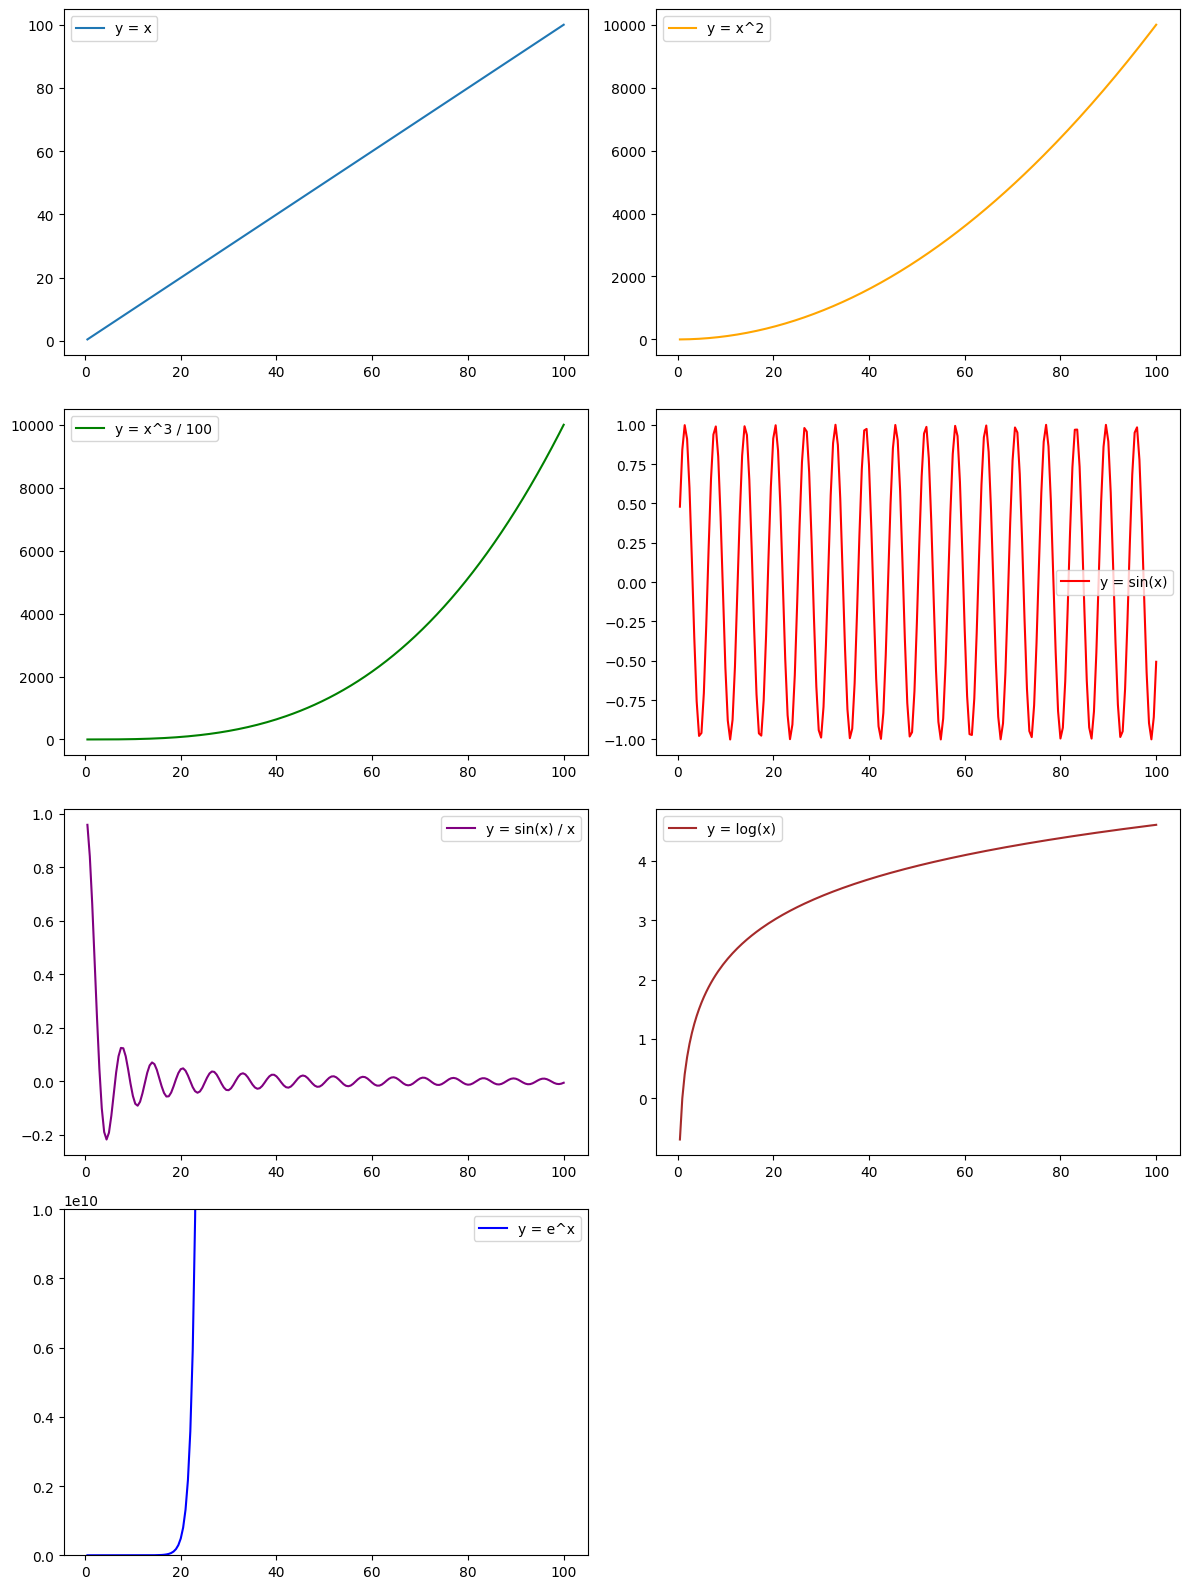

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define the domain
x = np.arange(0.5, 100.5, 0.5)

# Define the functions
y1 = x
y2 = x**2
y3 = x**3 / 100
y4 = np.sin(x)
y5 = np.sin(x) / x
y6 = np.log(x)
y7 = np.exp(x)

# Create the plots
plt.figure(figsize=(12, 16))

# Plot y = x
plt.subplot(4, 2, 1)
plt.plot(x, y1, label='y = x')
plt.legend()

# Plot y = x^2
plt.subplot(4, 2, 2)
plt.plot(x, y2, label='y = x^2', color='orange')
plt.legend()

# Plot y = x^3 / 100
plt.subplot(4, 2, 3)
plt.plot(x, y3, label='y = x^3 / 100', color='green')
plt.legend()

# Plot y = sin(x)
plt.subplot(4, 2, 4)
plt.plot(x, y4, label='y = sin(x)', color='red')
plt.legend()

# Plot y = sin(x) / x
plt.subplot(4, 2, 5)
plt.plot(x, y5, label='y = sin(x) / x', color='purple')
plt.legend()

# Plot y = log(x)
plt.subplot(4, 2, 6)
plt.plot(x, y6, label='y = log(x)', color='brown')
plt.legend()

# Plot y = e^x
plt.subplot(4, 2, 7)
plt.plot(x, y7, label='y = e^x', color='blue')
plt.ylim(0, 1e10)  # Set y-axis limit to avoid overflow
plt.legend()

# Adjust layout to avoid overlapping
plt.tight_layout()
plt.show()


# 10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [9]:
import numpy as np
import pandas as pd

# Generate the 20x5 matrix
matrix = np.random.uniform(1, 2, size=(20, 5))

# Create the DataFrame
df = pd.DataFrame(matrix, columns=["a", "b", "c", "d", "e"])

print(df)

           a         b         c         d         e
0   1.839910  1.739024  1.511330  1.273646  1.978385
1   1.364146  1.673069  1.454764  1.096746  1.206379
2   1.274899  1.958924  1.534511  1.769505  1.683857
3   1.357460  1.901512  1.590586  1.673545  1.375278
4   1.693279  1.086190  1.662632  1.334426  1.125059
5   1.823481  1.009270  1.007118  1.733370  1.855793
6   1.762607  1.982038  1.434282  1.373402  1.965750
7   1.289833  1.743619  1.318457  1.792101  1.041522
8   1.369073  1.624558  1.164131  1.505370  1.484876
9   1.279493  1.164115  1.779950  1.804640  1.993761
10  1.448337  1.925533  1.543566  1.595966  1.339091
11  1.635102  1.226201  1.845704  1.876369  1.476059
12  1.288984  1.732945  1.144168  1.306859  1.454715
13  1.058054  1.126841  1.791575  1.246851  1.697960
14  1.581703  1.032724  1.637393  1.457767  1.100918
15  1.344409  1.507005  1.009700  1.369575  1.702234
16  1.394326  1.473492  1.105145  1.829914  1.981977
17  1.568792  1.784427  1.801291  1.494340  1.

In [10]:
# Find the column with the highest standard deviation
column_std = df.std()
highest_std_column = column_std.idxmax()
print(f"Column with the highest standard deviation: {highest_std_column}")

# Find the row with the lowest mean
row_mean = df.mean(axis=1)
lowest_mean_row_index = row_mean.idxmin()
print(f"Row with the lowest mean: {lowest_mean_row_index}")

Column with the highest standard deviation: b
Row with the lowest mean: 18


#11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.#

In [12]:
# Add new column 'f' which is the sum of columns "a", "b", "c", "d", "e"
df['f'] = df.sum(axis=1)

# Add new column 'g' which is "LT8" if 'f' < 8 and "GT8" otherwise
df['g'] = df['f'].apply(lambda x: 'LT8' if x < 8 else 'GT8')

# Find the number of rows where 'g' is "LT8"
lt8_count = df[df['g'] == 'LT8'].shape[0]

# Find the standard deviation of 'f' for rows where 'g' is "LT8"
lt8_std = df[df['g'] == 'LT8']['f'].std()

# Find the standard deviation of 'f' for rows where 'g' is "GT8"
gt8_std = df[df['g'] == 'GT8']['f'].std()

print(f"Number of rows where 'g' is 'LT8': {lt8_count}")
print(f"Standard deviation of 'f' for rows where 'g' is 'LT8': {lt8_std}")
print(f"Standard deviation of 'f' for rows where 'g' is 'GT8': {gt8_std}")


Number of rows where 'g' is 'LT8': 15
Standard deviation of 'f' for rows where 'g' is 'LT8': 0.4542987847687117
Standard deviation of 'f' for rows where 'g' is 'GT8': 0.20494246261019386


#12.Write a small piece of code to explain broadcasting in numpy.#

In [13]:
import numpy as np

# Create a 3x3 matrix
matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

# Create a 1D array with 3 elements
vector = np.array([1, 2, 3])

# Add the 3x3 matrix and the 1D array
result = matrix + vector

print("Original matrix:")
print(matrix)

print("\nVector to be broadcast:")
print(vector)

print("\nResult of broadcasting:")
print(result)


Original matrix:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Vector to be broadcast:
[1 2 3]

Result of broadcasting:
[[ 2  4  6]
 [ 5  7  9]
 [ 8 10 12]]


#13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [14]:
import numpy as np

def func_argmin(arr):
    if arr.size == 0:
        raise ValueError("Cannot compute argmin of an empty array")

    min_index = 0
    min_value = arr[0]

    for i in range(1, len(arr)):
        if arr[i] < min_value:
            min_value = arr[i]
            min_index = i

    return min_index

# Test the function
array = np.array([3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5])
new_min_index = func_argmin(array)
np_min_index = np.argmin(array)

print(f"Computed argmin index: {new_min_index}")
print(f"np.argmin index: {np_min_index}")

# Verify that both results are the same
assert new_min_index == np_min_index, "Not correct"
print("Correct")


Computed argmin index: 1
np.argmin index: 1
Correct
